<a href="https://colab.research.google.com/github/coopwilliams/misc_code_challenges/blob/master/MLReview_CC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tuesday Code Challenge
## Review: Machine Learning Workflow

For today's code challenge you will be working to build a models to predict a company's available liquidity. 

Here is a link to the dataset you will be using https://github.com/pierretd/data-dump/raw/master/finance/liquidity/DS3_liquidity_data.txt

### 1. Data Exploration

Import NumPy, Pandas, Pyplot (from Matplotlib), and Seaborn

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Import Liquidity Data.txt into a new DataFrame
Display the first 5 rows

In [18]:
url = "https://raw.githubusercontent.com/pierretd/data-dump/master/finance/liquidity/DS3_liquidity_data.txt"
df = pd.read_csv(url)
df.head()

,available_liquidity,sp_score,market_cap,total_debt,ltm_capex,ltm_ebitda,ltm_fcf,ltm_revenue
0,28694.04271,2,54856.1961,84628.0,-9262.0,21387.00032,9488.0,170315.0
1,24784.00051,7,209150.6401,57909.0,-2021.0,15161.00019,12105.0,37727.0
2,24142.00013,6,180108.3453,32970.0,-1817.0,15818.99981,12604.0,192592.0
3,22132.00077,9,668024.3732,3935.0,-10263.0,31217.99987,27663.0,94765.0
4,20346.00000,6,144907.9931,42168.0,-3230.0,15801.00019,12061.0,78440.0


Display the unique values in 'sp_score'

In [19]:
# .unique() also works
df.sp_score.value_counts()

2     204
3     160
1     148
4      94
5      92
6      38
7      26
0      24
8       8
9       6
10      2
Name: sp_score, dtype: int64

### 2. Create a X and y as well as a test train split

Create your target and values to predict the target, ie X and y

In [20]:
df.iloc[:, 1:]

,sp_score,market_cap,total_debt,ltm_capex,ltm_ebitda,ltm_fcf,ltm_revenue
0,2,54856.19610,84628.000,-9262.000,21387.000320,9488.000,170315.000
1,7,209150.64010,57909.000,-2021.000,15161.000190,12105.000,37727.000
2,6,180108.34530,32970.000,-1817.000,15818.999810,12604.000,192592.000
3,9,668024.37320,3935.000,-10263.000,31217.999870,27663.000,94765.000
4,6,144907.99310,42168.000,-3230.000,15801.000190,12061.000,78440.000
...,...,...,...,...,...,...,...
797,0,27495.05946,651.481,-135.682,38.050000,-102.099,1226.337
798,0,15878.59251,683.239,-172.266,-646.639984,-308.993,1183.863
799,3,10305.69062,0.000,-42.868,302.445000,71.567,838.977
800,1,5360.16896,2485.625,-695.293,432.893000,-383.397,503.586


In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df.iloc[:, 1:], df['available_liquidity'], test_size=0.2, random_state=42)

Confirm that your target and inputs were created correctly


In [22]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((641, 7), (161, 7), (641,), (161,))

In [23]:
X_train.head()

,sp_score,market_cap,total_debt,ltm_capex,ltm_ebitda,ltm_fcf,ltm_revenue
432,6,164453.138400,20190.000,-4140.000,17064.999940,8009.000,55539.000
582,1,21016.604670,15539.300,-397.000,2464.600064,2022.600,11605.100
442,5,136139.530200,5180.000,-242.000,7210.999936,3979.000,11064.000
675,2,14288.343040,2996.400,-242.100,1322.700000,933.400,8598.800
334,2,8789.701632,3202.386,-87.888,1373.675008,839.534,3439.677


Create a train test split. Use a test size of .2 and random state 42


Confirm that your train test split was created correctly


Uset StandardScaler to scale the data and run a Lasso and Ridge model from sklearn
Stretch: Create a pipeline to scale and run the model simulataneously, and use a pipeline for the other models as well


In [0]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LassoCV, RidgeCV
from sklearn.metrics import mean_squared_error

pipe = Pipeline([('standard_scaler', StandardScaler()), 
                 ('Lasso',LassoCV(cv=5))])

In [37]:
pipe.fit(X_train, y_train)
print(pipe.score(X_train, y_train))
print(pipe.score(X_test, y_test))

0.6226020198538277
0.6047497972284379


In [39]:
from math import sqrt
y_pred = pipe.predict(X_test)
mse = mean_squared_error(y_pred, y_test)
print(mse, sqrt(mse))

6032314.871137523 2456.0771305350986


In [35]:
RidgePipe = Pipeline([('standard_scaler', StandardScaler()), 
                 ('Ridge',RidgeCV(cv=5))])
RidgePipe.fit(X_train, y_train)
print(RidgePipe.score(X_train, y_train))
print(RidgePipe.score(X_test, y_test))

0.623909063504746
0.5969011919024689


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [40]:
y_pred = RidgePipe.predict(X_test)
mse = mean_squared_error(y_pred, y_test)
print(mse, sqrt(mse))

6152100.410255626 2480.3428009562763


Run an ElasticNet model 


In [41]:
from sklearn.linear_model import ElasticNetCV
ElasticPipe = Pipeline([('standard_scaler', StandardScaler()), 
                 ('Elastic',ElasticNetCV(cv=5))])
ElasticPipe.fit(X_train, y_train)
y_pred = ElasticPipe.predict(X_test)
mse = mean_squared_error(y_pred, y_test)
print(mse, sqrt(mse))

6826316.128846951 2612.7219769518056


Run a RandomForestRegressor and GradientBoostingRegressor model 

In [44]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

rfr = Pipeline([('standard_scaler', StandardScaler()),
                ('rfr', RandomForestRegressor(n_estimators=100, n_jobs=-1))])
rfr.fit(X_train, y_train)
y_pred = rfr.predict(X_test)
mse = mean_squared_error(y_pred, y_test)
print(mse, sqrt(mse))

2101046.631788175 1449.498751909837


In [46]:
gbr = Pipeline([('standard_scaler', StandardScaler()),
                ('gbr', GradientBoostingRegressor(n_estimators=100))])
gbr.fit(X_train, y_train)
y_pred = gbr.predict(X_test)
mse = mean_squared_error(y_pred, y_test)
print(mse, sqrt(mse))

2436264.6974067013 1560.8538360162688


### 3. Hyperparameter Tuning

Create a hyperparameter grid for Lasso, run the model again


In [48]:
from sklearn.model_selection import GridSearchCV

lasso_params = {'Lasso__max_iter':[1000, 5000, 10000],
                'Lasso__n_alphas':[100, 500, 1000]}

grid_lasso = GridSearchCV(pipe, param_grid=lasso_params, n_jobs=-1)
grid_lasso.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('standard_scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('Lasso',
                                        LassoCV(alphas=None, copy_X=True, cv=5,
                                                eps=0.001, fit_intercept=True,
                                                max_iter=1000, n_alphas=100,
                                                n_jobs=None, normalize=False,
                                                positive=False,
                                                precompute='auto',
                                                random_state=None,
                                                selection='cyclic', t

In [51]:
y_pred = grid_lasso.best_estimator_.predict(X_test)
mse = mean_squared_error(y_pred, y_test)
print(mse, sqrt(mse))

6028881.790632842 2455.3781359767872


Create a hyperparameter grid for Ridge, run the model again


Create a hyperparameter grid for Elastic Net, run the model again


Create a hyperparameter grid for Random Forest, run the model again


In [55]:
rfr_params = {'rfr__n_estimators':[100, 500, 1000],
              'rfr__max_features':[3, 5, 7]}
grid_rfr = GridSearchCV(rfr, param_grid=rfr_params, n_jobs=-1)
grid_rfr.fit(X_train, y_train)
y_pred = grid_rfr.best_estimator_.predict(X_test)
mse = mean_squared_error(y_pred, y_test)
print(mse, sqrt(mse))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


2015983.0883292805 1419.8531925270586


Create a hyperparameter grid for Gradient Booster, run the model again

### 4. Selecting a Winning Model

Import the r-squared and mean absolute error metrics and calculate them for each of the models. Which model performed best? Why do you think that model performed best?


Make prediction with test data

Plot predictions on x axis and actuals on y axis

In [56]:
df.head()

,available_liquidity,sp_score,market_cap,total_debt,ltm_capex,ltm_ebitda,ltm_fcf,ltm_revenue
0,28694.04271,2,54856.1961,84628.0,-9262.0,21387.00032,9488.0,170315.0
1,24784.00051,7,209150.6401,57909.0,-2021.0,15161.00019,12105.0,37727.0
2,24142.00013,6,180108.3453,32970.0,-1817.0,15818.99981,12604.0,192592.0
3,22132.00077,9,668024.3732,3935.0,-10263.0,31217.99987,27663.0,94765.0
4,20346.00000,6,144907.9931,42168.0,-3230.0,15801.00019,12061.0,78440.0


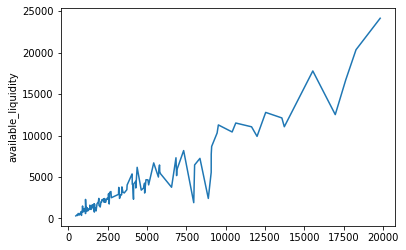

In [61]:
sns.lineplot(y_pred, y_test, ci=.95)

In [0]:
Choose one observation to make a prediction. How big was the difference between your prediction and your mean absolute error?